In [2]:
from __future__ import print_function, division
#define modules
%matplotlib inline

import thinkstats2
import thinkplot
import matplotlib
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('basketball_players.csv')
df2 = pd.read_csv('basketball_master.csv') #read data files

In [8]:
print(df.columns) #show data files content
print(df2.columns)

Index([u'playerID', u'year', u'stint', u'tmID', u'lgID', u'GP', u'GS',
       u'minutes', u'points', u'oRebounds', u'dRebounds', u'rebounds',
       u'assists', u'steals', u'blocks', u'turnovers', u'PF', u'fgAttempted',
       u'fgMade', u'ftAttempted', u'ftMade', u'threeAttempted', u'threeMade',
       u'PostGP', u'PostGS', u'PostMinutes', u'PostPoints', u'PostoRebounds',
       u'PostdRebounds', u'PostRebounds', u'PostAssists', u'PostSteals',
       u'PostBlocks', u'PostTurnovers', u'PostPF', u'PostfgAttempted',
       u'PostfgMade', u'PostftAttempted', u'PostftMade', u'PostthreeAttempted',
       u'PostthreeMade', u'note'],
      dtype='object')
Index([u'bioID', u'useFirst', u'firstName', u'middleName', u'lastName',
       u'nameGiven', u'fullGivenName', u'nameSuffix', u'nameNick', u'pos',
       u'firstseason', u'lastseason', u'height', u'weight', u'college',
       u'collegeOther', u'birthDate', u'birthCity', u'birthState',
       u'birthCountry', u'highSchool', u'hsCity', u'hsSta

In [9]:
df3=df[['playerID','GP','points','assists']] #select columns from dataframe 
df4=df2[['bioID','height','weight']] 

In [10]:
GP_not0 = df3[df3.GP > 0] #only take over zero numbers 

In [11]:
team = GP_not0.groupby('playerID')['GP','points'].sum() #order it from playerID and sum GP and points.
team=team.reset_index()
team

,playerID,GP,points
0,abdelal01,256,1465
1,abdulka01,1560,38387
2,abdulma01,724,9087
3,abdulma02,586,8553
4,abdulta01,236,1830
5,abdulza01,505,4557
6,abdursh01,830,15028
7,abernto01,319,1779
8,ablefo01,1,0
9,abramjo01,91,719


In [14]:
df4.rename(columns={"bioID":"playerID"},inplace=True) #rename column name

In [15]:
merge_DF = pd.merge(GP_not0,df4) #union dara frames 

In [16]:
merge_DF['avrg_points'] = merge_DF.points / merge_DF.GP #create new column average points
merge_DF

,playerID,GP,points,assists,height,weight,avrg_points
0,abramjo01,47,527,35,75.0,195.0,11.212766
1,abramjo01,4,4,1,75.0,195.0,1.000000
2,abramjo01,5,2,1,75.0,195.0,0.400000
3,abramjo01,35,186,0,75.0,195.0,5.314286
4,aubucch01,30,65,20,70.0,137.0,2.166667
5,bakerno01,4,0,0,72.0,180.0,0.000000
6,baltihe01,58,138,16,76.0,195.0,2.379310
7,barrjo01,58,295,54,75.0,205.0,5.086207
8,baumhfr01,45,631,54,70.0,170.0,14.022222
9,baumhfr01,26,274,0,70.0,170.0,10.538462


In [17]:
player = merge_DF.groupby('playerID')["GP","points"].sum() #group it faoun total GP and points
player=player.reset_index() #for error of data frame
mer_player = pd.merge(player,df4) #merge player and df4 dataframes

In [18]:
mer_player["height"] = mer_player.height * 2.54 #height inc to cm
mer_player['avrg_points'] = player.points / player.GP # average points column process and add 
#if run over the once it repeat process so it will be wrong

In [19]:
mer_player["height"] = mer_player.height/100 #convert height cm to meter

In [20]:
mer_player["weight"]=mer_player.weight*0.454 #convert lbs to kg

In [21]:
mer_player['body_indeks'] = mer_player.weight / (mer_player.height*mer_player.height) # calculate body's height and weight index


In [22]:
mer_player

,playerID,GP,points,height,weight,avrg_points,body_indeks
0,abdelal01,256,1465,2.0828,108.960,5.722656,25.117242
1,abdulka01,1560,38387,2.1590,102.150,24.607051,21.914577
2,abdulma01,724,9087,1.8796,83.990,12.551105,23.773696
3,abdulma02,586,8553,1.8542,73.548,14.595563,21.392312
4,abdulta01,236,1830,1.9812,101.242,7.754237,25.793132
5,abdulza01,505,4557,2.0574,104.420,9.023762,24.668697
6,abdursh01,830,15028,2.0574,102.150,18.106024,24.132421
7,abernto01,319,1779,2.0066,99.880,5.576803,24.806010
8,ablefo01,1,0,1.9050,81.720,0.000000,22.518445
9,abramjo01,91,719,1.9050,88.530,7.901099,24.394982


In [23]:
mergelast=mer_player[['playerID','avrg_points','body_indeks']] #selecet only column for using

In [24]:
print (mergelast.avrg_points.mode()) # statistic for points and body (height,weight) index
print (mergelast.body_indeks.mode())

print (mergelast.avrg_points.mean())
print (mergelast.body_indeks.mean())

print (mergelast.avrg_points.max())
print (mergelast.body_indeks.max())

print (mergelast.avrg_points.std())
print (mergelast.body_indeks.std())


print (mergelast.avrg_points.var())
print (mergelast.body_indeks.var())

0    0.0
dtype: float64
0    23.143957
dtype: float64
6.127174409326469
23.785249308792327
30.12313432835821
31.461755476856865
4.650716983058464
2.6513558725276214
21.629168456508424
7.0296879627867055


In [25]:
mergelast = mergelast[mergelast.avrg_points > 0] 
mergelast = mergelast[mergelast.body_indeks > 0]

In [26]:
pmf_avrg_points = thinkstats2.Pmf(mergelast.avrg_points, label='Average_Points') #create variable for pmf
pmf_body_indeks = thinkstats2.Pmf(mergelast.body_indeks, label='body_indeks')

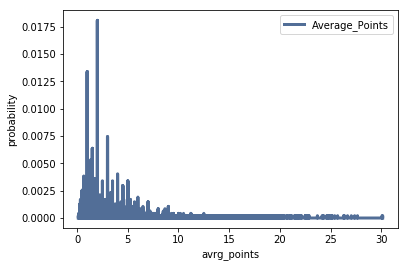

<Figure size 576x432 with 0 Axes>

In [27]:
thinkplot.Pmf(pmf_avrg_points) #plot pmf for points
thinkplot.Show(xlabel = 'avrg_points',ylabel="probability")

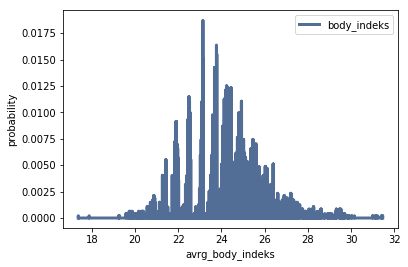

<Figure size 576x432 with 0 Axes>

In [28]:
thinkplot.Pmf(pmf_body_indeks) #plot pmf for body index
thinkplot.Show(xlabel = 'avrg_body_indeks',ylabel="probability")

(array([   2.,   24.,  255.,  870., 1901., 1099.,  394.,  111.,   37.,
           7.]),
 array([17.37534339, 18.7839846 , 20.19262581, 21.60126702, 23.00990823,
        24.41854943, 25.82719064, 27.23583185, 28.64447306, 30.05311427,
        31.46175548]),
 <a list of 10 Patch objects>)

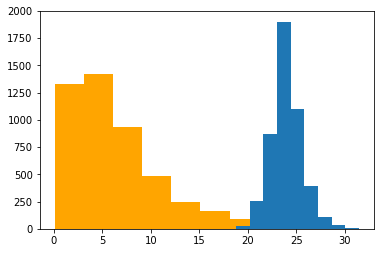

In [47]:
#thinkplot.Hist(avrg_pnt_hist,avrg_body_hist)
#thinkplot.Hist(avrg_body_hist)

import matplotlib.pyplot as plt

#thinkplot.Hist(avrg_pnt_hist)

plt.hist(mergelast.avrg_points,color="orange",label="points") # plot histogram average and body

plt.hist(mergelast.body_indeks)



In [31]:
avrg_points_cdf = thinkstats2.Cdf(mergelast.avrg_points, label='Average Points') #create variable for cdf
body_cdf = thinkstats2.Cdf(mergelast.body_indeks, label='Body index')

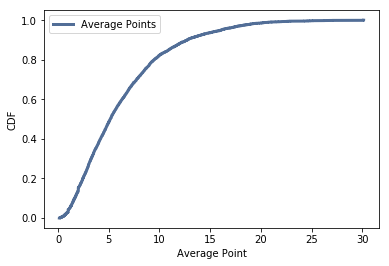

In [32]:
thinkplot.Cdfs([avrg_points_cdf]) #plot cdf for points
thinkplot.Config(xlabel='Average Point', ylabel='CDF')

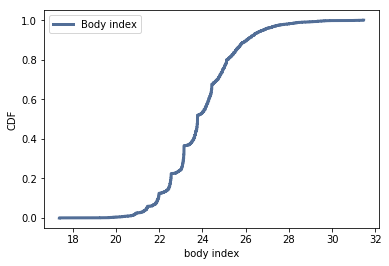

In [33]:

thinkplot.Cdfs([body_cdf]) # plot cdf for bod index
thinkplot.Config(xlabel='body index', ylabel='CDF')

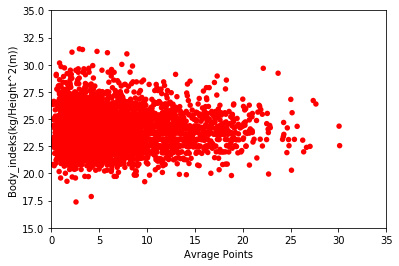

In [48]:
mergelast = mergelast[mergelast.avrg_points > 0]
mergelast = mergelast[mergelast.body_indeks > 0]
thinkplot.Scatter(mergelast.avrg_points, mergelast.body_indeks, alpha=1,color='red') #scatter points and body index
thinkplot.Config(xlabel='Avrage Points',
                 ylabel='Body_indeks(kg/Height^2(m))',
                 axis=[0, 35, 15, 35],
                 legend=False)

In [49]:
def Jitter(values, jitter=0.5): 
    n = len(values)
    return np.random.normal(0, jitter, n) + values #add random -+ jittern for each values

In [50]:
points_javr = Jitter(mergelast.body_indeks,0.5)
body_jit=Jitter(mergelast.avrg_points,0.5)

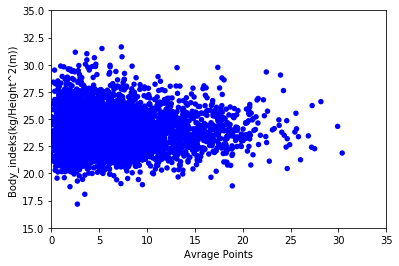

In [54]:
thinkplot.Scatter(body_jit,points_javr,alpha=1.0) #scatter again with jittern
thinkplot.Config(xlabel='Avrage Points',
                 ylabel='Body_indeks(kg/Height^2(m))',
                 axis=[0, 35, 15, 35],
                 legend=False)


In [38]:
def Cov(a,b,meanx = None,meany = None): #coveriance for constant formula I take it 240 files(and for others)
    a = np.asarray(a)
    b = np.asarray(b)
    
    if meanx is None:
        meanx = np.mean(a)
    if meany is None:
        meany = np.mean(b)
    
    cov = np.dot(a-meanx,b-meany) / len(a)
    return cov

In [42]:
Cov(mergelast.avrg_points,mergelast.body_indeks) #use Cov function with our datas

-0.29059028849501134

In [43]:
def Corr(xs, ys): #Correlation function 
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr


In [44]:
Corr(mergelast.avrg_points, mergelast.body_indeks) #using our datas in Corr

-0.03847371739315529

In [ ]:
mergelast = mergelast[mergelast.avrg_points > 0]
mergelast = mergelast[mergelast.body_indeks > 0]
thinkplot.Scatter(mergelast.avrg_points, mergelast.body_indeks, alpha=1,color='red') #scatter points and body index
thinkplot.Config(xlabel='Avrage Points',
                 ylabel='Body_indeks(kg/Height^2(m))',
                 axis=[0, 35, 15, 35],
                 legend=False)

In [45]:
def SpearmanCorr(xs, ys): # Spearman dunction
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)


In [46]:
SpearmanCorr(mergelast.avrg_points, mergelast.body_indeks) #using our data for spearman

-0.04545486002283289

In [51]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys


In [52]:
data = mergelast.avrg_points, mergelast.body_indeks
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue


0.007

In [53]:
ht.actual, ht.MaxTestStat()


(0.03847371739315529, 0.05256339426190857)